In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 100 задач с pandas
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'>

<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#101'>10 простых примеров использования pandas</a></li>
<li><a href='#creation'>Создание объектов pandas</a></li>
<li><a href='#functions'>Встроенные функции</a></li>
<li><a href='#access'>Просмотр данных</a></li>
<li><a href='#edit'>Редактирование данных</a></li>
<li><a href='#add'>Добавление данных</a></li>
<li><a href='#delete'>Удаление данных</a></li>
<li><a href='#ops'>Операции с данными</a></li>
<li><a href='#structure_ops'>Операции со структурами pandas</a></li>
<li><a href='#time'>Работа со временем</a></li>
<li><a href='#graphics'>Графика</a></li>
<li><a href='#io'>Ввод и вывод данных</a></li>
<li><a href='#system'>Системные настройки</a></li>
<li><a href='#links'>Полезные cсылки</a></li>
</ol>

# Введение <a name='intro'></a>

Документ содержит практические примеры использования библиотеки pandas для анализа данных.

Материал состоит из 100 типовых задач, которые можно выполнить с помощью функций pandas.

Для удобства задачи разбиты на группы, к которым можно быстро перейти в <a href='#toc'>Оглавлении</a>.

Python библиотека pandas (https://pandas.pydata.org) предназначена для анализа данных, содержит большое количество функций, делающих работу с данными быстрой и удобной. Обычно при исследовании исходные данные берутся из внешних источников - файлов (txt, csv, excel-файлы), баз данных, через открытые интерфейсы (API, socket). pandas содержит удобные средства для загрузки данных и последующего анализа, преобразования, визуализации (совместно с библиотеками matplotlib и seaborn) и сохранения результатов в файле заданного формата (csv, xls).

Основные конструкции pandas: pandas.Series (одномерный массив) и pandas.DataFrame (двумерный массив). Pandas удобно применять для задач машинного обучения: столбцы pandas.DataFrame легко интерпретировать как значения конкретного признака для различных наблюдений, а строки - как результаты (набор значений признаков) отдельного измерения (наблюдения).

Для начала практического изучения использования библиотеки pandas рекомендуется изучить раздел "10 простых примеров использования pandas" (этого зачастую достаточно для решения большинства задач), после чего переходить к более сложным примерам. При невозможности установки python и pandas для практической работы можно воспользоваться ресурсом "Google colab" https://colab.research.google.com/

Подробные описания использованных функций находятся на официальной странице проекта https://pandas.pydata.org

<a href='#toc'>Назад к Оглавлению</a>


# 10 простых примеров использования pandas 
<a id='101'></a>

#### Импортировать библиотеку pandas. Посмотреть версию.

In [2]:
import pandas as pd
print(pd.__version__)

1.1.1


#### Создать объект pandas.Series

In [3]:
s = pd.Series([1, 2, 3])
display(s)

0    1
1    2
2    3
dtype: int64

#### Обратиться к отдельному элементу объекта pandas.Series по индексу

In [4]:
s = pd.Series(['Екатеринбург', 'Москва', 'Санкт-Петербург', 'Владивосток'])
display(s)
print(s[0])
print()
print(s[2:4])

0       Екатеринбург
1             Москва
2    Санкт-Петербург
3        Владивосток
dtype: object

Екатеринбург

2    Санкт-Петербург
3        Владивосток
dtype: object


#### Определить числовые характеристики последовательности pandas.Series - максимальное и минимальное значение, среднее значение, дисперсию

In [5]:
s = pd.Series(np.random.randint(low=1, high=100, size=10))
display(s)
print(s.max(), s.min(), s.mean(), s.var())

0    97
1    97
2    39
3    11
4    20
5    79
6    69
7    75
8    73
9    67
dtype: int64

97 11 62.7 888.0111111111111


#### Создать объект pandas.DataFrame

In [146]:
df = pd.DataFrame({"Столбец 1": [1, 2, 3], "Столбец 2": ['a', 'b', 'c']})
display(df)

,Столбец 1,Столбец 2
0,1,a
1,2,b
2,3,c


#### Обратиться к отдельной строке, колонке, отдельному элементу датафрейма pandas.DataFrame

In [7]:
df = pd.DataFrame({"Числа": np.arange(1,5), "Буквы": np.random.choice(['a', 'b', 'c', 'd', 'e'], size=4)})
display(df)

,Числа,Буквы
0,1,c
1,2,c
2,3,a
3,4,a


In [8]:
df['Числа']

0    1
1    2
2    3
3    4
Name: Числа, dtype: int64

In [9]:
df[2:3]

,Числа,Буквы
2,3,a


In [10]:
df[0:1].Буквы

0    c
Name: Буквы, dtype: object

#### Найти наибольший и наименьший элемент для каждой строки и столбца датафрейма pandas.DataFrame

In [11]:
df = pd.DataFrame(np.random.randint(low=1, high=100, size=25).reshape(5, 5))
display(df)

,0,1,2,3,4
0,22,50,7,82,22
1,73,26,34,90,18
2,11,15,73,55,60
3,98,92,80,39,87
4,5,28,41,94,99


Максимумы и минимумы для строк.

In [12]:
df.max(axis=1), df.min(1)

(0    82
 1    90
 2    73
 3    98
 4    99
 dtype: int64,
 0     7
 1    18
 2    11
 3    39
 4     5
 dtype: int64)

Максимумы и минимумы для столбцов.

In [13]:
df.max(0), df.min(axis=0)

(0    98
 1    92
 2    80
 3    94
 4    99
 dtype: int64,
 0     5
 1    15
 2     7
 3    39
 4    18
 dtype: int64)

#### Редактировать отдельные поля объекта pandas.DataFrame

In [14]:
df = pd.DataFrame(np.zeros((2, 3)))
display(df)
df.loc[1, 1] = 1
display(df)

,0,1,2
0,0.0,0.0,0.0
1,0.0,0.0,0.0


,0,1,2
0,0.0,0.0,0.0
1,0.0,1.0,0.0


#### Получить общую информацию о содержимом датафрейма pd.DataFrame

In [15]:
s = pd.Series(['Екатеринбург', 'Москва', 'Санкт-Петербург', 'Владивосток'])
df = pd.DataFrame({'Город': s, 'Число': range(4, 0, -1)})
display(df)
print("Общая информация о содержании таблицы")
df.info()

,Город,Число
0,Екатеринбург,4
1,Москва,3
2,Санкт-Петербург,2
3,Владивосток,1


Общая информация о содержании таблицы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Город   4 non-null      object
 1   Число   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


#### Визуализировать содержание датафрейма pandas.DataFrame

In [16]:
xs = np.linspace(-10, 10, 100)

df = pd.DataFrame({'sin': np.sin(xs), 'cos': np.cos(xs)})
display(df.head(5))

,sin,cos
0,0.544021,-0.839072
1,0.364599,-0.931165
2,0.170347,-0.985384
3,-0.030834,-0.999525
4,-0.230760,-0.973011


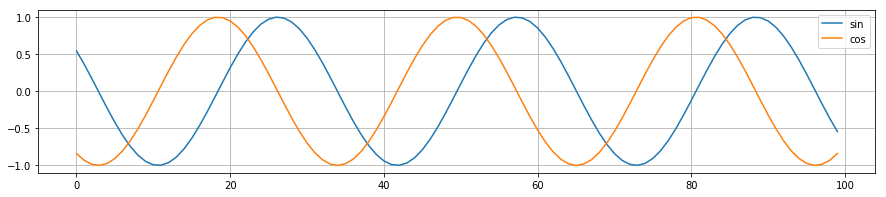

In [17]:
df.plot(grid=True, figsize=(15, 3))

<a href='#toc'>Назад к Оглавлению</a>

# Создание объектов pandas <a id="creation"></a>

#### Создать одномерный массив pandas.Series из 10 натуральных чисел от 1 до 10

In [18]:
s = pd.Series(range(1, 11))
print(s)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64


In [19]:
print(s.min(), s.max(), s.sum(), s[5])

1 10 55 6


#### Создать одномерный массив pandas.Series, заполненный квадратами первых 10 натуральных чисел. 

In [20]:
s = pd.Series([i**2 for i in np.arange(1, 11)])
display(s)

0      1
1      4
2      9
3     16
4     25
5     36
6     49
7     64
8     81
9    100
dtype: int64

#### Создать pandas.Series, заполненные всеми буквами английского алфавита (от A до Z).

In [21]:
print("ord(\"A\")={}, ord(\"Z\")={}".format(ord("A"), ord("Z")))
print("chr(65)={}, chr(90)={}".format(chr(65), chr(90)))
s = pd.Series([chr(i) for i in range(65, 91)])
print(s)

ord("A")=65, ord("Z")=90
chr(65)=A, chr(90)=Z
0     A
1     B
2     C
3     D
4     E
5     F
6     G
7     H
8     I
9     J
10    K
11    L
12    M
13    N
14    O
15    P
16    Q
17    R
18    S
19    T
20    U
21    V
22    W
23    X
24    Y
25    Z
dtype: object


#### Создать Series, заполненный 10 значениями с 01.01.2020 с интервалом 2 секунды

In [22]:
rng = pd.date_range('1/1/2020', periods=10, freq='2s')
rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:02',
               '2020-01-01 00:00:04', '2020-01-01 00:00:06',
               '2020-01-01 00:00:08', '2020-01-01 00:00:10',
               '2020-01-01 00:00:12', '2020-01-01 00:00:14',
               '2020-01-01 00:00:16', '2020-01-01 00:00:18'],
              dtype='datetime64[ns]', freq='2S')

#### Создать Series, заполненный 10 значениями с 01.01.2020 с интервалом 3 дня, 13 недель, один год

In [23]:
pd.date_range('01/01/2020', periods=10, freq='3d')

DatetimeIndex(['2020-01-01', '2020-01-04', '2020-01-07', '2020-01-10',
               '2020-01-13', '2020-01-16', '2020-01-19', '2020-01-22',
               '2020-01-25', '2020-01-28'],
              dtype='datetime64[ns]', freq='3D')

In [24]:
pd.date_range('01/01/2020', periods=10, freq='13w')

DatetimeIndex(['2020-01-05', '2020-04-05', '2020-07-05', '2020-10-04',
               '2021-01-03', '2021-04-04', '2021-07-04', '2021-10-03',
               '2022-01-02', '2022-04-03'],
              dtype='datetime64[ns]', freq='13W-SUN')

In [25]:
pd.date_range('01/01/2020', periods=10, freq='y')

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

#### Создать DataFrame размером 3х3, заполненный единицами

In [26]:
np.array([1 for i in range(9)]).reshape(3,-1)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [27]:
df = pd.DataFrame(np.array([1 for i in range(9)]).reshape(3, -1),
                  columns=['A','B','C'], 
                  index=['a','b','c'])

In [28]:
df

,A,B,C
a,1,1,1
b,1,1,1
c,1,1,1


#### Создать DataFrame размером 3х3 со значениями, равными сумме номеров строки и столбца.

In [29]:
m = [[i+j for i in range(3)] for j in range(3)]
df = pd.DataFrame(m)
df

,0,1,2
0,0,1,2
1,1,2,3
2,2,3,4


#### Создать DataFrame из 10 строк и 3 столбцов, заполненных случайными значениями от 0 до 1, названия столбцов - латинские буквы. Вывести первые 2 строки и последние 2.

In [30]:
df = pd.DataFrame(np.random.rand(10,3), columns=["A", "B", "C"])
display(df)
display(df.head(2))
display(df.tail(2))

,A,B,C
0,0.938758,0.318435,0.123206
1,0.263551,0.338433,0.670569
2,0.274147,0.773588,0.666144
3,0.358141,0.049760,0.807151
4,0.082236,0.522153,0.925643
5,0.648275,0.506243,0.521089
6,0.485959,0.340058,0.716017
7,0.821339,0.775630,0.372806
8,0.085145,0.717754,0.383181
9,0.160839,0.779864,0.429574


,A,B,C
0,0.938758,0.318435,0.123206
1,0.263551,0.338433,0.670569


,A,B,C
8,0.085145,0.717754,0.383181
9,0.160839,0.779864,0.429574


#### Создать DataFrame с использованием NumPy массива (ndarray), с индексом datetime64 (первый день каждого месяца в текущем году) и столбцами, обозначенными буквами от A до F.

In [31]:
dates = pd.date_range('20200101', periods=12)
print(dates)
data = np.array([[i+j for i in range(6)] for j in range(12)])
print(data, type(data))
df = pd.DataFrame(data, index=dates, columns=list('ABCDEF'))
df

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
              dtype='datetime64[ns]', freq='D')
[[ 0  1  2  3  4  5]
 [ 1  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]
 [ 8  9 10 11 12 13]
 [ 9 10 11 12 13 14]
 [10 11 12 13 14 15]
 [11 12 13 14 15 16]] <class 'numpy.ndarray'>


,A,B,C,D,E,F
2020-01-01,0,1,2,3,4,5
2020-01-02,1,2,3,4,5,6
2020-01-03,2,3,4,5,6,7
2020-01-04,3,4,5,6,7,8
2020-01-05,4,5,6,7,8,9
2020-01-06,5,6,7,8,9,10
2020-01-07,6,7,8,9,10,11
2020-01-08,7,8,9,10,11,12
2020-01-09,8,9,10,11,12,13
2020-01-10,9,10,11,12,13,14


#### Создать DataFrame с использованием словаря python

In [32]:
data = {'id': [1,2,3], 'name': ['Ivanov', 'Petrov', 'Sidorov']}

In [33]:
df = pd.DataFrame(data, columns=['id', 'name'])

In [34]:
df

,id,name
0,1,Ivanov
1,2,Petrov
2,3,Sidorov


#### Создать DataFrame с помощью словаря. Типы столбцов float64, float32, int32, Timestamp, Categorical, bool. Вывести информацию о типах столбцов DataFrame.

In [35]:
num = 10
df1 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(num)), dtype='float32'),
                    'D': np.array([3] * num, dtype='int32'),
                    'E': pd.Categorical([np.random.choice(["test", "train"]) for _ in range(num)]),
                    'F': 'foo',
                    'G': np.array([np.random.choice([1, 0]) for _ in range(num)], dtype='bool')
                  })
print(df1.dtypes)
df1

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G              bool
dtype: object


,A,B,C,D,E,F,G
0,1.0,2013-01-02,1.0,3,train,foo,False
1,1.0,2013-01-02,1.0,3,train,foo,False
2,1.0,2013-01-02,1.0,3,train,foo,True
3,1.0,2013-01-02,1.0,3,test,foo,False
4,1.0,2013-01-02,1.0,3,train,foo,False
5,1.0,2013-01-02,1.0,3,train,foo,True
6,1.0,2013-01-02,1.0,3,test,foo,True
7,1.0,2013-01-02,1.0,3,test,foo,False
8,1.0,2013-01-02,1.0,3,test,foo,False
9,1.0,2013-01-02,1.0,3,train,foo,True


<a href='#toc'>Назад к Оглавлению</a>

# Встроенные функции <a name='functions'></a>

In [36]:
df = pd.DataFrame({'A': np.random.random(5), 'B': np.random.randint(low=0, high=10, size=5)})
display(df)

,A,B
0,0.792782,9
1,0.310563,8
2,0.367083,9
3,0.328650,6
4,0.039260,4


#### Статистические функции
- mean() - среднее значение
- var() - дисперсия
- std() - среднеквадратичное отклонение
- min() - минимум
- max() - максимум
- skew() - коэффициент ассимметрии
- kurt() - эксцесс
- mode() - мода
- median() - медиана

In [37]:
print(df.mean())
print(df.var())
print(df.std())
print(df.min())
print(df.max())
print(df.skew())
print(df.kurt())
print(df.median())

A    0.367668
B    7.200000
dtype: float64
A    0.073339
B    4.700000
dtype: float64
A    0.270812
B    2.167948
dtype: float64
A    0.03926
B    4.00000
dtype: float64
A    0.792782
B    9.000000
dtype: float64
A    0.863551
B   -0.912717
dtype: float64
A    2.296578
B   -0.737890
dtype: float64
A    0.32865
B    8.00000
dtype: float64


In [38]:
df

,A,B
0,0.792782,9
1,0.310563,8
2,0.367083,9
3,0.328650,6
4,0.039260,4


In [39]:
df.describe()

,A,B
count,5.000000,5.000000
mean,0.367668,7.200000
std,0.270812,2.167948
min,0.039260,4.000000
25%,0.310563,6.000000
50%,0.328650,8.000000
75%,0.367083,9.000000
max,0.792782,9.000000


<a href='#toc'>Назад к Оглавлению</a>

# Просмотр данных <a name='access'></a>

Создадим pandas.DataFrame для дальнейшей работы в этом разделе.

In [168]:
df_purchase = pd.DataFrame({'Дата': pd.date_range('01/01/2020', periods=10, freq='w'),
                            'Выручка': np.random.random(10)*1000,
                            'Регион': np.random.choice(['Москва', 'Екатеринбург', 'Санкт-Петербург'], size=10)
                          })
df_purchase

,Дата,Выручка,Регион
0,2020-01-05,289.867,Екатеринбург
1,2020-01-12,135.687,Москва
2,2020-01-19,913.250,Москва
3,2020-01-26,677.967,Москва
4,2020-02-02,696.180,Екатеринбург
5,2020-02-09,761.384,Москва
6,2020-02-16,491.254,Санкт-Петербург
7,2020-02-23,19.255,Москва
8,2020-03-01,134.030,Санкт-Петербург
9,2020-03-08,142.155,Екатеринбург


#### В датафрейме df_purchase посмотреть только верхние и нижние строки таблицы. Вывести 3 произвольных строки таблицы.

In [148]:
display(df_purchase.head(n=2))
display(df_purchase.tail(n=2))

,Дата,Выручка,Регион
0,2020-01-05,826.817,Санкт-Петербург
1,2020-01-12,516.756,Екатеринбург


,Дата,Выручка,Регион
8,2020-03-01,876.951,Екатеринбург
9,2020-03-08,564.353,Санкт-Петербург


#### Посмотреть информацию о DataFrame

In [149]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Дата     10 non-null     datetime64[ns]
 1   Выручка  10 non-null     float64       
 2   Регион   10 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 368.0+ bytes


#### Посмотреть индексы и колонки

In [150]:
print(df_purchase.index)
print(df_purchase.columns)
df_purchase

RangeIndex(start=0, stop=10, step=1)
Index(['Дата', 'Выручка', 'Регион'], dtype='object')


,Дата,Выручка,Регион
0,2020-01-05,826.817,Санкт-Петербург
1,2020-01-12,516.756,Екатеринбург
2,2020-01-19,525.445,Санкт-Петербург
3,2020-01-26,916.081,Екатеринбург
4,2020-02-02,43.971,Санкт-Петербург
5,2020-02-09,424.832,Санкт-Петербург
6,2020-02-16,125.270,Санкт-Петербург
7,2020-02-23,896.979,Санкт-Петербург
8,2020-03-01,876.951,Екатеринбург
9,2020-03-08,564.353,Санкт-Петербург


#### Посмотреть статистику по таблице

In [151]:
print(df_purchase.describe())

       Выручка
count   10.000
mean   571.746
std    313.979
min     43.971
25%    447.813
50%    544.899
75%    864.418
max    916.081


#### Посмотреть статистику только по колонкам таблицы с заданным типом

In [152]:
df_purchase.describe(include=['float'])

,Выручка
count,10.000
mean,571.746
std,313.979
min,43.971
25%,447.813
50%,544.899
75%,864.418
max,916.081


#### Посмотреть уникальные значения столбца

In [153]:
df_purchase['Регион'].unique()

array(['Санкт-Петербург', 'Екатеринбург'], dtype=object)

#### Посмотреть только второй столбец DataFrame.

In [154]:
df_purchase.columns[1]

'Выручка'

In [156]:
df_purchase[df_purchase.columns[1]]

0   826.817
1   516.756
2   525.445
3   916.081
4    43.971
5   424.832
6   125.270
7   896.979
8   876.951
9   564.353
Name: Выручка, dtype: float64

In [157]:
df_purchase.Выручка

0   826.817
1   516.756
2   525.445
3   916.081
4    43.971
5   424.832
6   125.270
7   896.979
8   876.951
9   564.353
Name: Выручка, dtype: float64

#### Посмотреть вторую и третью строки DataFrame


In [158]:
df_purchase[1:3]

,Дата,Выручка,Регион
1,2020-01-12,516.756,Екатеринбург
2,2020-01-19,525.445,Санкт-Петербург


#### Посмотреть значение во второй строке третьего столбца DataFrame.


In [159]:
df_purchase[1:2][df_purchase.columns[2]]

1    Екатеринбург
Name: Регион, dtype: object

#### Получить подтаблицу DataFrame из вторых и третьих строк и столбцов по названиям строк и столбцов.

In [160]:
df_purchase.loc[1:2,'Выручка':'Регион']

,Выручка,Регион
1,516.756,Екатеринбург
2,525.445,Санкт-Петербург


#### Получить подтаблицу DataFrame из вторых и третьих строк и столбцов по номерам строк и столбцов.

In [161]:
df_purchase.iloc[1:3, 1:3]

,Выручка,Регион
1,516.756,Екатеринбург
2,525.445,Санкт-Петербург


#### В DataFrame оставить только информацию для региона "Екатеринбург"

In [169]:
df_purchase

,Дата,Выручка,Регион
0,2020-01-05,289.867,Екатеринбург
1,2020-01-12,135.687,Москва
2,2020-01-19,913.250,Москва
3,2020-01-26,677.967,Москва
4,2020-02-02,696.180,Екатеринбург
5,2020-02-09,761.384,Москва
6,2020-02-16,491.254,Санкт-Петербург
7,2020-02-23,19.255,Москва
8,2020-03-01,134.030,Санкт-Петербург
9,2020-03-08,142.155,Екатеринбург


In [170]:
df_purchase[df_purchase.Регион=='Екатеринбург']

,Дата,Выручка,Регион
0,2020-01-05,289.867,Екатеринбург
4,2020-02-02,696.180,Екатеринбург
9,2020-03-08,142.155,Екатеринбург


#### Вывести строки для которых значения в столбце Выручка больше 700

In [163]:
df_purchase[df_purchase.Выручка > 700]

,Дата,Выручка,Регион
0,2020-01-05,826.817,Санкт-Петербург
3,2020-01-26,916.081,Екатеринбург
7,2020-02-23,896.979,Санкт-Петербург
8,2020-03-01,876.951,Екатеринбург


#### Вывести информацию, соответствующую значениям из заданного множества

In [164]:
df_purchase[df_purchase['Дата'].isin(['2020-01-05', '2020-02-02', '2020-03-01'])]

,Дата,Выручка,Регион
0,2020-01-05,826.817,Санкт-Петербург
4,2020-02-02,43.971,Санкт-Петербург
8,2020-03-01,876.951,Екатеринбург


#### Для категориального типа определить частотность вхождения элементов

In [171]:
df_purchase

,Дата,Выручка,Регион
0,2020-01-05,289.867,Екатеринбург
1,2020-01-12,135.687,Москва
2,2020-01-19,913.250,Москва
3,2020-01-26,677.967,Москва
4,2020-02-02,696.180,Екатеринбург
5,2020-02-09,761.384,Москва
6,2020-02-16,491.254,Санкт-Петербург
7,2020-02-23,19.255,Москва
8,2020-03-01,134.030,Санкт-Петербург
9,2020-03-08,142.155,Екатеринбург


In [172]:
df_purchase.Регион.value_counts()

Москва             5
Екатеринбург       3
Санкт-Петербург    2
Name: Регион, dtype: int64

<a href='#toc'>Назад к Оглавлению</a>

# Редактирование данных <a name='edit'></a>

#### Создать DataFrame 3x3, заполненный случайными значениями. Заполнить все элементы на главной диагонали значением 1.

In [64]:
df = pd.DataFrame(np.random.random((3, 3)), columns=['A', 'B', 'C'])
for i in range(3):
    df.iloc[i, i] = 1
df

,A,B,C
0,1.000000,0.968220,0.826074
1,0.755147,1.000000,0.476342
2,0.200984,0.264523,1.000000


#### Установить значение элемента во второй строке столбца 'B' в 0

In [65]:
df.at[1,'B'] = 0
df

,A,B,C
0,1.000000,0.968220,0.826074
1,0.755147,0.000000,0.476342
2,0.200984,0.264523,1.000000


#### Установить значение элемента в третьей строке второго столбца в $\pi$

In [66]:
df.iat[1, 2] = np.pi
df

,A,B,C
0,1.000000,0.968220,0.826074
1,0.755147,0.000000,3.141593
2,0.200984,0.264523,1.000000


#### Заменить все значения столбца 'C' значением -1

In [67]:
[-1]*len(df)

[-1, -1, -1]

In [68]:
df.loc[:,'C'] = pd.Series([-1]*len(df))
df

,A,B,C
0,1.000000,0.968220,-1
1,0.755147,0.000000,-1
2,0.200984,0.264523,-1


#### Изменить тип колонки

In [69]:
df = pd.DataFrame({
    'A': np.array([i**2 for i in range(3)]),
    'B': np.array(np.random.choice([1,0], size=3), dtype='bool')
    })
display(df)
df.info()

,A,B
0,0,False
1,1,True
2,4,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      bool 
dtypes: bool(1), int64(1)
memory usage: 155.0 bytes


In [70]:
df['B'] = df['B'].astype('int32')
display(df)
df.info()

,A,B
0,0,0
1,1,1
2,4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int32
dtypes: int32(1), int64(1)
memory usage: 164.0 bytes


#### Заменить все значения в столбце средним арифметическим этого столбца

In [71]:
df = pd.DataFrame(np.random.randint(low=1, high=101, size=9).reshape(3,3), columns=['A', 'B', 'C'])
df

,A,B,C
0,1,40,2
1,25,7,60
2,63,59,26


In [72]:
df.C = df.loc[:,'C'].apply(lambda x: df.C.mean())

In [73]:
df

,A,B,C
0,1,40,29.333333
1,25,7,29.333333
2,63,59,29.333333


#### Заменить категориальные значения

In [176]:
df_persons = pd.DataFrame({
    'Surname': np.array(['Ivanov', 'Petrova']),
    'Gender': np.array(['male', 'female'])
})
display(df_persons)

,Surname,Gender
0,Ivanov,male
1,Petrova,female


In [177]:
df_persons['Gender'] = df_persons['Gender'].map({'male': 1, 'female': 0})
display(df_persons)

,Surname,Gender
0,Ivanov,1
1,Petrova,0


In [178]:
df_persons = df_persons.replace({'Gender':{1: 'мужской', 0: 'женский'}})
print(df_persons)

   Surname   Gender
0   Ivanov  мужской
1  Petrova  женский


#### Транспонировать DataFrame

In [77]:
display(df)
df.T

,A,B,C
0,1,40,29.333333
1,25,7,29.333333
2,63,59,29.333333


,0,1,2
A,1.000000,25.000000,63.000000
B,40.000000,7.000000,59.000000
C,29.333333,29.333333,29.333333


#### Создать DataFrame с названием df_travel со столбцами: начальная дата каждого месяца (столбец “Date”), название города (столбец “City”), соответствующее этой дате, и цифровое значение (столбец “Result”). Посмотреть типы столбцов.

In [78]:
df_travel = pd.DataFrame({"Date" : pd.date_range("2020.01.01", periods=12),
                 "City" : [np.random.choice(["Yekaterinburg", 
                                             "Moscow", 
                                             "Vladivostok",
                                             "Salekhard",
                                             "Krasnodar"])
                           for _ in range(12)],
                 "Result" : np.random.rand(12)})
print(df_travel.dtypes)
df_travel

Date      datetime64[ns]
City              object
Result           float64
dtype: object


,Date,City,Result
0,2020-01-01,Moscow,0.159703
1,2020-01-02,Yekaterinburg,0.238234
2,2020-01-03,Vladivostok,0.123492
3,2020-01-04,Moscow,0.452018
4,2020-01-05,Yekaterinburg,0.881494
5,2020-01-06,Vladivostok,0.182916
6,2020-01-07,Moscow,0.024280
7,2020-01-08,Vladivostok,0.893837
8,2020-01-09,Krasnodar,0.219679
9,2020-01-10,Krasnodar,0.709908


#### В DataFrame df_travel отсортировать строки по убыванию индекса

In [79]:
df_travel.sort_index(ascending=False)

,Date,City,Result
11,2020-01-12,Krasnodar,0.261147
10,2020-01-11,Krasnodar,0.547833
9,2020-01-10,Krasnodar,0.709908
8,2020-01-09,Krasnodar,0.219679
7,2020-01-08,Vladivostok,0.893837
6,2020-01-07,Moscow,0.024280
5,2020-01-06,Vladivostok,0.182916
4,2020-01-05,Yekaterinburg,0.881494
3,2020-01-04,Moscow,0.452018
2,2020-01-03,Vladivostok,0.123492


#### В DataFrame df_travel отсортировать строки по значениям столбца “Result” по убыванию

In [80]:
df_travel.sort_values("Result", ascending=False)

,Date,City,Result
7,2020-01-08,Vladivostok,0.893837
4,2020-01-05,Yekaterinburg,0.881494
9,2020-01-10,Krasnodar,0.709908
10,2020-01-11,Krasnodar,0.547833
3,2020-01-04,Moscow,0.452018
11,2020-01-12,Krasnodar,0.261147
1,2020-01-02,Yekaterinburg,0.238234
8,2020-01-09,Krasnodar,0.219679
5,2020-01-06,Vladivostok,0.182916
0,2020-01-01,Moscow,0.159703


<a href='#toc'>Назад к Оглавлению</a>

# Добавление данных <a name='add'></a>

#### Создать DataFrame 3х3, заполненный случайными значениями

In [182]:
df = pd.DataFrame(np.random.random((4,3)), columns=list('ABC'))
df

,A,B,C
0,0.399,0.245,0.740
1,0.713,0.024,0.466
2,0.940,0.675,0.368
3,0.093,0.504,0.762


#### Добавить столбец 'D', содержащий четыре элемента

In [183]:
df['D'] = pd.Series(np.random.randint(low=1, high=6, size=4))
df

,A,B,C,D
0,0.399,0.245,0.740,3
1,0.713,0.024,0.466,3
2,0.940,0.675,0.368,1
3,0.093,0.504,0.762,3


#### Для категориального признака добавить столбцы

In [184]:
df1 = df.copy('deep')
for elem in set(df.D.unique()):
    df1["D"+str(elem)] = df['D'].apply(lambda x: 1 if x==elem else 0)

In [186]:
df

,A,B,C,D
0,0.399,0.245,0.740,3
1,0.713,0.024,0.466,3
2,0.940,0.675,0.368,1
3,0.093,0.504,0.762,3


In [187]:
df1

,A,B,C,D,D1,D3
0,0.399,0.245,0.740,3,0,1
1,0.713,0.024,0.466,3,0,1
2,0.940,0.675,0.368,1,1,0
3,0.093,0.504,0.762,3,0,1


In [189]:
df2 = pd.get_dummies(df, columns=['D'])
df2

,A,B,C,D_1,D_3
0,0.399,0.245,0.740,0,1
1,0.713,0.024,0.466,0,1
2,0.940,0.675,0.368,1,0
3,0.093,0.504,0.762,0,1


<a href='#toc'>Назад к Оглавлению</a>

# Удаление данных <a name='delete'></a>

Создадим типовой DataFrame.

In [190]:
data = np.random.randint(low=1, high=100, size=(4,6))
df = pd.DataFrame(data, columns=list('ABCDEF'))
df

,A,B,C,D,E,F
0,14,74,73,19,63,40
1,17,24,2,41,20,29
2,57,73,59,4,56,37
3,24,66,15,48,2,37


#### Удалить первый столбец, применив изменения в DataFrame (inplace=True)

In [88]:
df.drop(['A'], axis=1, inplace=True)

In [89]:
df

,B,C,D,E,F
0,86,94,68,7,60
1,8,48,15,18,47
2,1,54,70,35,34
3,43,3,9,5,99


#### Удалить столбцы без применения изменений в DataFrame

In [90]:
df.drop(['E','F'], axis=1)

,B,C,D
0,86,94,68
1,8,48,15
2,1,54,70
3,43,3,9


In [91]:
df

,B,C,D,E,F
0,86,94,68,7,60
1,8,48,15,18,47
2,1,54,70,35,34
3,43,3,9,5,99


#### Убрать строки по определенному условию

In [92]:
df.loc[df.F>60]

,B,C,D,E,F
3,43,3,9,5,99


In [93]:
df.loc[~(df.F<60)]

,B,C,D,E,F
0,86,94,68,7,60
3,43,3,9,5,99


In [94]:
df.query("F>60")

,B,C,D,E,F
3,43,3,9,5,99


In [95]:
df.query("F not in [47]")

,B,C,D,E,F
0,86,94,68,7,60
2,1,54,70,35,34
3,43,3,9,5,99


In [96]:
print(np.where(df.F>60))
print(np.where(df.F>60)[0])
df.drop(np.where(df.F>60)[0])

(array([3]),)
[3]


,B,C,D,E,F
0,86,94,68,7,60
1,8,48,15,18,47
2,1,54,70,35,34


In [97]:
df

,B,C,D,E,F
0,86,94,68,7,60
1,8,48,15,18,47
2,1,54,70,35,34
3,43,3,9,5,99


#### Сброс индексов

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B       4 non-null      int64
 1   C       4 non-null      int64
 2   D       4 non-null      int64
 3   E       4 non-null      int64
 4   F       4 non-null      int64
dtypes: int64(5)
memory usage: 288.0 bytes


In [99]:
df.drop(1, axis=0, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B       3 non-null      int64
 1   C       3 non-null      int64
 2   D       3 non-null      int64
 3   E       3 non-null      int64
 4   F       3 non-null      int64
dtypes: int64(5)
memory usage: 144.0 bytes


In [101]:
df = df1.reset_index(drop=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       10 non-null     float64       
 1   B       10 non-null     datetime64[ns]
 2   C       10 non-null     float32       
 3   D       10 non-null     int32         
 4   E       10 non-null     category      
 5   F       10 non-null     object        
 6   G       10 non-null     bool          
dtypes: bool(1), category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 564.0+ bytes


<a href='#toc'>Назад к Оглавлению</a>

# Операции с данными <a name='ops'></a>

In [191]:
df_travel

,Date,City,Result
0,2020-01-01,Moscow,0.160
1,2020-01-02,Yekaterinburg,0.238
2,2020-01-03,Vladivostok,0.123
3,2020-01-04,Moscow,0.452
4,2020-01-05,Yekaterinburg,0.881
5,2020-01-06,Vladivostok,0.183
6,2020-01-07,Moscow,0.024
7,2020-01-08,Vladivostok,0.894
8,2020-01-09,Krasnodar,0.220
9,2020-01-10,Krasnodar,0.710


#### Вычислить среднее значение столбца  Result

In [104]:
df_travel['Result'].mean()

0.39121157127760164

#### Вычислить сумму элементов строк

In [105]:
df = pd.DataFrame({
    'A': np.array([i**2 for i in range(3)]),
    'B': np.array([i**3 for i in range(3)]),
    'C': np.array([i**4 for i in range(3)]),   
})
display(df)
print(df[:1].apply(np.sum, axis=1))
print(df[1:2].apply(np.sum, axis=1))
print(df[2:].apply(np.sum, axis=1))

,A,B,C
0,0,0,0
1,1,1,1
2,4,8,16


0    0
dtype: int64
1    3
dtype: int64
2    28
dtype: int64


#### Округлить значения в столбце db_travel.Result до одного знака после запятой

In [106]:
df_travel['Result'].apply(lambda x: round(x,1))

0     0.2
1     0.2
2     0.1
3     0.5
4     0.9
5     0.2
6     0.0
7     0.9
8     0.2
9     0.7
10    0.5
11    0.3
Name: Result, dtype: float64

#### Все названия городов записать большими буквами

In [107]:
df_travel['City'].apply(lambda x: x.upper())

0            MOSCOW
1     YEKATERINBURG
2       VLADIVOSTOK
3            MOSCOW
4     YEKATERINBURG
5       VLADIVOSTOK
6            MOSCOW
7       VLADIVOSTOK
8         KRASNODAR
9         KRASNODAR
10        KRASNODAR
11        KRASNODAR
Name: City, dtype: object

#### В df_travel посчитать количество вхождений каждого элемента столбца «City”

In [108]:
df_travel.City.value_counts()

Krasnodar        4
Moscow           3
Vladivostok      3
Yekaterinburg    2
Name: City, dtype: int64

#### В df_travel получить суммарные результаты для каждого города

In [109]:
df_travel.groupby("City")["Result"].sum()

City
Krasnodar        1.738565
Moscow           0.636000
Vladivostok      1.200245
Yekaterinburg    1.119728
Name: Result, dtype: float64

#### В df_travel отобразить график с данными числового столбца Result

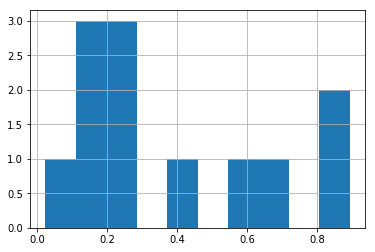

In [110]:
df_travel.Result.hist()

#### Мультииндекс

In [111]:
t = list(zip(*[['one','one','two','two'], ['street','city','street','city']]))
print(t)
index = pd.MultiIndex.from_tuples(t, names=['first','second'])
df1 = pd.DataFrame(np.ones((4,2)), index=index)
df1

[('one', 'street'), ('one', 'city'), ('two', 'street'), ('two', 'city')]


0    1
first second          
one   street  1.0  1.0
      city    1.0  1.0
two   street  1.0  1.0
      city    1.0  1.0

#### Сводная таблица (crosstab)

In [112]:
pd.crosstab(df_travel['City'], df_travel['Result'].apply(lambda x: round(x,2)), margins=True)

Result,0.02,0.12,0.16,0.18,0.22,0.24,0.26,0.45,0.55,0.71,0.88,0.89,All
City,,,,,,,,,,,,,
Krasnodar,0,0,0,0,1,0,1,0,1,1,0,0,4
Moscow,1,0,1,0,0,0,0,1,0,0,0,0,3
Vladivostok,0,1,0,1,0,0,0,0,0,0,0,1,3
Yekaterinburg,0,0,0,0,0,1,0,0,0,0,1,0,2
All,1,1,1,1,1,1,1,1,1,1,1,1,12


#### Сводная таблица (pivottable)

In [113]:
df_travel

,Date,City,Result
0,2020-01-01,Moscow,0.159703
1,2020-01-02,Yekaterinburg,0.238234
2,2020-01-03,Vladivostok,0.123492
3,2020-01-04,Moscow,0.452018
4,2020-01-05,Yekaterinburg,0.881494
5,2020-01-06,Vladivostok,0.182916
6,2020-01-07,Moscow,0.024280
7,2020-01-08,Vladivostok,0.893837
8,2020-01-09,Krasnodar,0.219679
9,2020-01-10,Krasnodar,0.709908


In [114]:
df_travel.pivot_table(['Result'], index='Date', aggfunc='mean')

,Result
Date,
2020-01-01,0.159703
2020-01-02,0.238234
2020-01-03,0.123492
2020-01-04,0.452018
2020-01-05,0.881494
2020-01-06,0.182916
2020-01-07,0.024280
2020-01-08,0.893837
2020-01-09,0.219679


#### Нарисовать гистограмму

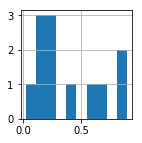

In [115]:
df_travel['Result'].hist(figsize=(2,2))

0     1
1     4
2     2
3     1
4     4
5     2
6     1
7     2
8     0
9     0
10    0
11    0
Name: City, dtype: int64


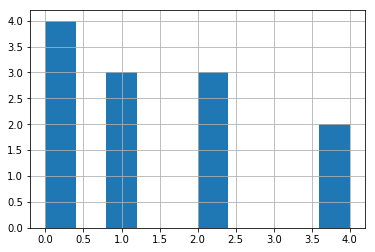

In [192]:
print(df_travel['City'].map({'Krasnodar': 0, 'Moscow': 1, 'Vladivostok': 2, 'Salekhard': 3, 'Yekaterinburg': 4}))
df_travel['City'].map({'Krasnodar': 0, 'Moscow': 1, 'Vladivostok': 2, 'Salekhard': 3, 'Yekaterinburg': 4}).hist()

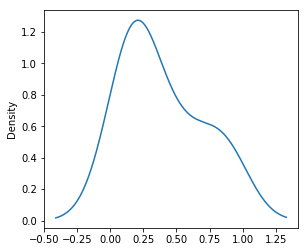

In [117]:
df_travel['Result'].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4));

<a href='#toc'>Назад к Оглавлению</a>

# Операции со структурами pandas <a name='structure_ops'></a>

#### Конкатенация двух датафеймов

In [193]:
dfA = pd.DataFrame([[1,'Moscow'], [2,'Yekaterinburg']], columns=['Number', 'City'])
dfB = pd.DataFrame([[3,'Vladivostok'], [4,'Novosibirsk']], columns=['Number', 'City'])

In [194]:
pd.concat([dfA, dfB],axis=0)

,Number,City
0,1,Moscow
1,2,Yekaterinburg
0,3,Vladivostok
1,4,Novosibirsk


In [120]:
pd.concat([dfA, dfB],axis=1)

,Number,City,Number,City
0,1,Moscow,3,Vladivostok
1,2,Yekaterinburg,4,Novosibirsk


#### Слияние двух датафреймов

In [121]:
clients_data = {'id': [1,2,3], 'name': ['Ivanov', 'Petrov', 'Sidorov']}
dfClients = pd.DataFrame(clients_data, columns=['id','name'])
dfClients

,id,name
0,1,Ivanov
1,2,Petrov
2,3,Sidorov


In [122]:
work_data = {'id': [1,2], 'work': ['MTS', 'RTK']}
dfWork = pd.DataFrame(work_data, columns=['id','work'])
dfWork

,id,work
0,1,MTS
1,2,RTK


In [123]:
pd.merge(dfClients, dfWork, on='id')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK


In [124]:
pd.merge(dfClients, dfWork, on='id', how='outer')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK
2,3,Sidorov,NaN


In [125]:
pd.merge(dfClients, dfWork, on='id', how='left')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK
2,3,Sidorov,NaN


In [126]:
pd.merge(dfClients, dfWork, on='id', how='right')

,id,name,work
0,1,Ivanov,MTS
1,2,Petrov,RTK


<a href='#toc'>Назад к Оглавлению</a>

# Работа со временем <a name='time'></a>

In [127]:
datetime = pd.date_range('2000/01/01', periods=20, freq='w')

In [128]:
datetime

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30', '2000-02-06', '2000-02-13', '2000-02-20',
               '2000-02-27', '2000-03-05', '2000-03-12', '2000-03-19',
               '2000-03-26', '2000-04-02', '2000-04-09', '2000-04-16',
               '2000-04-23', '2000-04-30', '2000-05-07', '2000-05-14'],
              dtype='datetime64[ns]', freq='W-SUN')

In [129]:
df = pd.DataFrame(index=datetime)
df

""
2000-01-02
2000-01-09
2000-01-16
2000-01-23
2000-01-30
2000-02-06
2000-02-13
2000-02-20
2000-02-27
2000-03-05


In [130]:
df['Value'] = np.random.choice([1,2,3], size=len(df))
df.T

,2000-01-02,2000-01-09,2000-01-16,2000-01-23,2000-01-30,2000-02-06,2000-02-13,2000-02-20,2000-02-27,2000-03-05,2000-03-12,2000-03-19,2000-03-26,2000-04-02,2000-04-09,2000-04-16,2000-04-23,2000-04-30,2000-05-07,2000-05-14
Value,3,2,2,2,3,1,2,2,3,3,1,3,2,2,3,2,1,3,2,2


In [131]:
df.resample('M').sum()

,Value
2000-01-31,12
2000-02-29,8
2000-03-31,9
2000-04-30,11
2000-05-31,4


<a href='#toc'>Назад к Оглавлению</a>

# Графика <a name='graphics'></a>

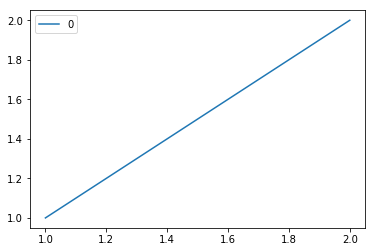

In [132]:
df = pd.DataFrame([1,2],[1,2])
df.plot()
plt.show()

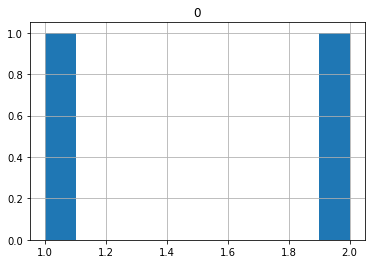

In [133]:
df.hist()
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ввод и вывод данных <a name='io'></a>

#### Преобразовать DataFrame в массив numpy

In [134]:
df.to_numpy()

array([[1],
       [2]])

### CSV

In [135]:
df = pd.DataFrame([[1,'A'],[2,'B']])
display(df)

,0,1
0,1,A
1,2,B


In [136]:
print(os.path.exists('test.csv'))

True


In [137]:
df.to_csv('test.csv', index=False, header=False)
print(os.path.exists('test.csv'))

True


In [138]:
df1 = pd.read_csv('test.csv', header=None)
display(df1)

,0,1
0,1,A
1,2,B


### XLS

In [139]:
df.to_excel('test.xlsx', sheet_name='Sheet1')
pd.read_excel('test.xlsx', sheet_name='Sheet1')

,Unnamed: 0,0,1
0,0,1,A
1,1,2,B


<a href='#toc'>Назад к Оглавлению</a>

# Системные настройки <a name='system'></a>

#### С помощью pandas посмотреть версии установленных библиотек.

In [140]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : f2ca0a2665b2d169c97de87b8e778dbed86aea07
python           : 3.7.4.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.2.0-kali2-amd64
Version          : #1 SMP Debian 5.2.9-2kali1 (2019-08-22)
machine          : x86_64
processor        : 
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.1
numpy            : 1.16.2
pytz             : 2019.2
dateutil         : 2.7.3
pip              : 20.2.2
setuptools       : 41.0.1
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 1.1.2
lxml.etree       : 4.3.3
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.7 (dt dec pq3 ext lo64)
jinja2           : 2.10.1
IPython          : 7.17.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : No

#### Изменить параметры вывода данных на экран

In [141]:
a = np.random.random(size=(4,4))
df = pd.DataFrame(a)
display(df)

,0,1,2,3
0,0.183006,0.289934,0.862378,0.761111
1,0.417067,0.294724,0.344863,0.045832
2,0.278390,0.925452,0.435021,0.854420
3,0.870446,0.345939,0.020654,0.109531


Количество знаков после запятой

In [142]:
pd.set_option("display.precision", 2)
display(df)

,0,1,2,3
0,0.18,0.29,0.86,0.76
1,0.42,0.29,0.34,0.05
2,0.28,0.93,0.44,0.85
3,0.87,0.35,0.02,0.11


Максимальное количество столбцов

In [143]:
pd.set_option('display.max_columns', 20) 
display(df)

,0,1,2,3
0,0.18,0.29,0.86,0.76
1,0.42,0.29,0.34,0.05
2,0.28,0.93,0.44,0.85
3,0.87,0.35,0.02,0.11


Максимальное количество строк

In [144]:
pd.set_option('display.max_rows', 20)
display(df)

,0,1,2,3
0,0.18,0.29,0.86,0.76
1,0.42,0.29,0.34,0.05
2,0.28,0.93,0.44,0.85
3,0.87,0.35,0.02,0.11


In [145]:
pd.set_option('display.float_format', '{:,.3f}'.format)
display(df)

,0,1,2,3
0,0.183,0.290,0.862,0.761
1,0.417,0.295,0.345,0.046
2,0.278,0.925,0.435,0.854
3,0.870,0.346,0.021,0.110


<a href='#toc'>Назад к Оглавлению</a>

# Полезные ссылки <a name='links'></a>

- https://pandas.pydata.org/
    
- https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

- https://colab.research.google.com/

<a href='#toc'>Назад к Оглавлению</a>